#DIA 7
##Temario
- Manipulación de Datos
- Limpieza de Datos
- Introducción a la Regresión Lineal

##Datos

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = {}
import pandas as pd

data = {"nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis", None], "edad": [23, 35, None, 29, 41, 30], "ciudad": ["CDMX", "cdmx", "Monterrey ", "GDL", "  gdl", "CDMX"], "ingresos": ["$12,000", "$18,500", "$15,300", None, "$22000.", "$17800."]}

##Manipulación de datos

In [5]:
#nota: para importar un .csv se usa el:
#df = pd.read_csv("NombreArchivo.csv")
df = pd.DataFrame(data)
df

,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,NaN,Monterrey,"$15,300"
3,Maria,29.0,GDL,None
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


###Qué es un DataFrame?
Es una tabla de datos: filas (registros) y columnas ( variables).

In [6]:
#Exploración de los datos
df.head()

,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
2,Pedro,NaN,Monterrey,"$15,300"
3,Maria,29.0,GDL,None
4,Luis,41.0,gdl,$22000.


In [7]:
#Si deseas ver las columnas puedes hacerlo con
df.columns

Index(['nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nombre    5 non-null      object 
 1   edad      5 non-null      float64
 2   ciudad    6 non-null      object 
 3   ingresos  5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 324.0+ bytes


In [9]:
df.describe(include="all") #te da una mera descripción de todas

,nombre,edad,ciudad,ingresos
count,5,5.00000,6,5
unique,5,NaN,5,5
top,Ana,NaN,CDMX,"$12,000"
freq,1,NaN,2,1
mean,NaN,31.60000,NaN,NaN
std,NaN,6.76757,NaN,NaN
min,NaN,23.00000,NaN,NaN
25%,NaN,29.00000,NaN,NaN
50%,NaN,30.00000,NaN,NaN
75%,NaN,35.00000,NaN,NaN


In [10]:
df.columns

Index(['nombre', 'edad', 'ciudad', 'ingresos'], dtype='object')

In [11]:
df["edad"]

,edad
0,23.0
1,35.0
2,NaN
3,29.0
4,41.0
5,30.0


In [12]:
df[df["edad"] > 30]

,nombre,edad,ciudad,ingresos
1,Juan,35.0,cdmx,"$18,500"
4,Luis,41.0,gdl,$22000.


In [14]:
print(df)
df[
    (df["edad"] > 18) &
    (df["ingresos"] != "$22,000") &
    (df["nombre"] != "Juan")
]

  nombre  edad      ciudad ingresos
0    Ana  23.0        CDMX  $12,000
1   Juan  35.0        cdmx  $18,500
2  Pedro   NaN  Monterrey   $15,300
3  Maria  29.0         GDL     None
4   Luis  41.0         gdl  $22000.
5   None  30.0        CDMX  $17800.


,nombre,edad,ciudad,ingresos
0,Ana,23.0,CDMX,"$12,000"
3,Maria,29.0,GDL,None
4,Luis,41.0,gdl,$22000.
5,None,30.0,CDMX,$17800.


In [16]:
#Uso de count(), mean(), sum(), fillna(), str.replace(), astype()
print(df["edad"].count()) #son 6 pero 1 es None
print("---------------")
print(df["edad"].mean()) #promedio
print("---------------")
print(df["edad"].sum()) #suma
print("---------------")
print(df["nombre"].fillna("Desconocido")) #rellena los valores con el dato que gustes
print("---------------")
print(df["ingresos"].str.replace("$", "").str.replace(",", "").astype(float))
#str.replace reemplaza x simbolo por y
#.astype(tipo_de_Dato) cambia el tipo de dato de tu columna

5
---------------
31.6
---------------
158.0
---------------
0            Ana
1           Juan
2          Pedro
3          Maria
4           Luis
5    Desconocido
Name: nombre, dtype: object
---------------
0    12000.0
1    18500.0
2    15300.0
3        NaN
4    22000.0
5    17800.0
Name: ingresos, dtype: float64


## Limpieza de Datos

In [17]:
df_clean = df.copy()
print(df_clean)
# Rellenar valores faltantes
df_clean["edad"] = df_clean["edad"].fillna(df_clean["edad"].mean())
df_clean["ingresos"] = df_clean["ingresos"].fillna("$0")
df_clean["ciudad"] = df_clean["ciudad"].fillna("Desconocida")
df_clean["nombre"] = df_clean["nombre"].fillna("Desconocido")
print(df_clean)

#

  nombre  edad      ciudad ingresos
0    Ana  23.0        CDMX  $12,000
1   Juan  35.0        cdmx  $18,500
2  Pedro   NaN  Monterrey   $15,300
3  Maria  29.0         GDL     None
4   Luis  41.0         gdl  $22000.
5   None  30.0        CDMX  $17800.
        nombre  edad      ciudad ingresos
0          Ana  23.0        CDMX  $12,000
1         Juan  35.0        cdmx  $18,500
2        Pedro  31.6  Monterrey   $15,300
3        Maria  29.0         GDL       $0
4         Luis  41.0         gdl  $22000.
5  Desconocido  30.0        CDMX  $17800.


In [18]:
print(df)
print(df_clean)

  nombre  edad      ciudad ingresos
0    Ana  23.0        CDMX  $12,000
1   Juan  35.0        cdmx  $18,500
2  Pedro   NaN  Monterrey   $15,300
3  Maria  29.0         GDL     None
4   Luis  41.0         gdl  $22000.
5   None  30.0        CDMX  $17800.
        nombre  edad      ciudad ingresos
0          Ana  23.0        CDMX  $12,000
1         Juan  35.0        cdmx  $18,500
2        Pedro  31.6  Monterrey   $15,300
3        Maria  29.0         GDL       $0
4         Luis  41.0         gdl  $22000.
5  Desconocido  30.0        CDMX  $17800.


In [20]:
df_clean["ciudad"] = (
    df_clean["ciudad"]
    .str.lower() #todo en minuscuas o upper para mayusculas
    .str.strip()
)

In [ ]:
#Ahora con los datos limpios podemos trabajar con ellos
#Ejercicio Rápido
#1) Saca los nombre de todos
#2) Saca los nombres de todos sin los que digan desconocidos
#3)Saca la cantidad de personas que hay por medio de ciudad
#Ahora pondremos uno un poco más dfícil
#4) Saa TODOS los datos donde no se muestre desconocido, donde no se muetren los que son de monterrey en ciudad
#y donde no se muestre los ingresos que sean $0
#5) Saca la edad promedio de las personas que no son de la ciudad de cdmx que ganan mayor o igual que $10,000

In [21]:
#1)
df_clean["nombre"]

,nombre
0,Ana
1,Juan
2,Pedro
3,Maria
4,Luis
5,Desconocido


In [22]:
#2)
df_clean[df_clean["nombre"] != "Desconocido"]["nombre"]

,nombre
0,Ana
1,Juan
2,Pedro
3,Maria
4,Luis


In [23]:
#3)
df_clean["ciudad"].count()

np.int64(6)

In [25]:
#4)
df_clean[(df_clean["nombre"] != "Desconocido") & (df_clean["ciudad"] != "monterrey") & (df_clean["ingresos"] != "$0")]

,nombre,edad,ciudad,ingresos
0,Ana,23.0,cdmx,"$12,000"
1,Juan,35.0,cdmx,"$18,500"
4,Luis,41.0,gdl,$22000.


In [26]:
#5) Saca la edad promedio de las personas que no son de la ciudad de cdmx que ganan mayor o igual a 10,000
df_clean[(df_clean["ciudad"] != "cdmx") & (df_clean["ingresos"] != "$10,000")]["edad"].mean()

np.float64(33.86666666666667)

In [27]:
# Limpiemos una última vez el DataFrame inicial para iniciar con Regresión Lineal
df_clean["ingresos"] = df_clean["ingresos"].str.replace("$", "").str.replace(",", "").astype(float)

## Introducción a la Regresión Lineal

In [28]:
from sklearn.linear_model import LinearRegression

# Qué es una regresión Lineal
Una regresión intenta precedir un valor numérico a partir de otros datos

Ejemplo:
- Predecir ingresos según edad
- Predecir precio según tamaño
Aquí usaremos regresión lineal: el tipo más simple


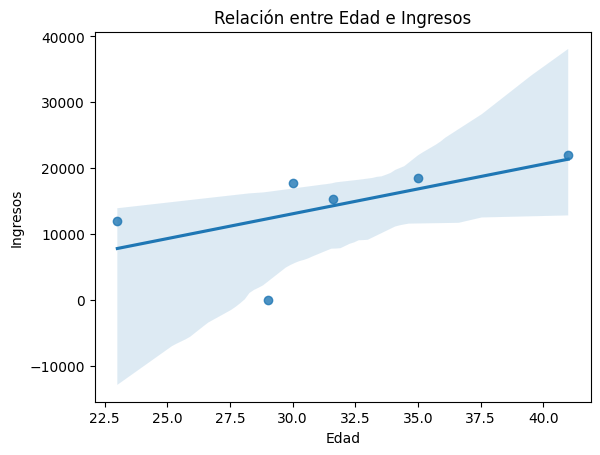

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x = df_clean["edad"], y = df_clean["ingresos"])
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.title("Relación entre Edad e Ingresos")
plt.show()

In [30]:
#MATRIZ DE CORRELACIÓN
#df_clean.corr()
df_clean[["edad", "ingresos"]].corr()

# 0.0 -> nada
# 0.3 -> débil
# 0.5 - 0.7 -> moderada
# >0.8 -> fuerte

,edad,ingresos
edad,1.000000,0.588779
ingresos,0.588779,1.000000


In [31]:
X = df_clean[["edad"]]
y = df_clean["ingresos"]
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

Tiene relación con la fórmula de la pendiente
¿Qué hace fit? Busca los valores de m, y b que mejor se ajustan a tus datos
Minimiza el error entre los ingresos reales y los ingresos predichos.

In [33]:
edad_nueva = [[30]]
predicción = modelo.predict(edad_nueva)
print(predicción)

[13061.25181951]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
# Podemos evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score
y_pred = modelo.predict(X) #son los ingresos que el modelo cree según la edad
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)
print(r2)

0.34666091920946085
